In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('MBB.csv')
#df1=df.reset_index()['Price']
df=df.reset_index()['Price']
df

0       11783.9
1       12267.4
2       12267.4
3       12307.6
4       12448.7
         ...   
1237    18850.0
1238    18800.0
1239    18450.0
1240    18600.0
1241    18650.0
Name: Price, Length: 1242, dtype: float64

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 15s 524ms/step - loss: 0.0189 - val_loss: 0.0512
Epoch 2/100
11/11 [==============================] - 3s 289ms/step - loss: 0.0045 - val_loss: 0.0118
Epoch 3/100
11/11 [==============================] - 3s 295ms/step - loss: 0.0016 - val_loss: 0.0104
Epoch 4/100
11/11 [==============================] - 3s 304ms/step - loss: 0.0011 - val_loss: 0.0140
Epoch 5/100
11/11 [==============================] - 3s 302ms/step - loss: 0.0012 - val_loss: 0.0182
Epoch 6/100
11/11 [==============================] - 3s 307ms/step - loss: 9.9439e-04 - val_loss: 0.0129
Epoch 7/100
11/11 [==============================] - 3s 305ms/step - loss: 8.9173e-04 - val_loss: 0.0165
Epoch 8/100
11/11 [==============================] - 3s 300ms/step - loss: 8.6223e-04 - val_loss: 0.0133
Epoch 9/100
11/11 [==============================] - 3s 302ms/step - loss: 8.6656e-04 - val_loss: 0.0068
Epoch 10/100
11/11 [==============================] - 3s 299ms/step - loss

11/11 [==============================] - 3s 267ms/step - loss: 3.9451e-04 - val_loss: 0.0018
Epoch 79/100
11/11 [==============================] - 3s 270ms/step - loss: 3.0059e-04 - val_loss: 0.0025
Epoch 80/100
11/11 [==============================] - 3s 284ms/step - loss: 2.9220e-04 - val_loss: 0.0050
Epoch 81/100
11/11 [==============================] - 3s 278ms/step - loss: 3.1452e-04 - val_loss: 0.0027
Epoch 82/100
11/11 [==============================] - 3s 280ms/step - loss: 3.0600e-04 - val_loss: 0.0018
Epoch 83/100
11/11 [==============================] - 3s 276ms/step - loss: 2.9619e-04 - val_loss: 0.0033
Epoch 84/100
11/11 [==============================] - 3s 276ms/step - loss: 3.4287e-04 - val_loss: 0.0020
Epoch 85/100
11/11 [==============================] - 3s 275ms/step - loss: 3.2810e-04 - val_loss: 0.0016
Epoch 86/100
11/11 [==============================] - 3s 294ms/step - loss: 3.3950e-04 - val_loss: 0.0035
Epoch 87/100
11/11 [==============================] - 4s 32

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 97ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
train_size1 = int(0.6 * len(df))
test_size1 = int(0.3 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1)

In [13]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val1)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 1333.1140188936613
Testing RMSE: 4043.6626453018607
Validation MAPE: 6.001383244992699
Testing MAPE: 14.392391444926513
Validation MAE: 1031.3447578125
Testing MAE: 3178.955034595646


In [14]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=65
i=0
while(i<30):

    if(len(temp_input)>65):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.5565086]
66
1 day input [0.51460152 0.5076118  0.54489028 0.53091085 0.51460152 0.50994171
 0.48897256 0.46800341 0.46800341 0.48664265 0.47499313 0.4633436
 0.47033332 0.47499313 0.48431275 0.49363237 0.49130246 0.47965294
 0.46567351 0.49363237 0.47732303 0.47732303 0.47033332 0.47266322
 0.47499313 0.47499313 0.49130246 0.50062208 0.50295199 0.51693142
 0.51460152 0.51460152 0.53557066 0.53790057 0.54023047 0.52625104
 0.53091085 0.53091085 0.53790057 0.53557066 0.52858095 0.51693142
 0.51460152 0.50994171 0.5076118  0.50994171 0.5052819  0.51460152
 0.51460152 0.51926133 0.52159123 0.52392114 0.51227161 0.5076118
 0.51460152 0.51693142 0.52625104 0.52625104 0.53324076 0.54256038
 0.54023047 0.52392114 0.53091085 0.53324076 0.5565086 ]
1 day output [[0.5605165]]
2 day input [0.5076118  0.54489028 0.53091085 0.51460152 0.50994171 0.48897256
 0.46800341 0.46800341 0.48664265 0.47499313 0.4633436  0.47033332
 0.47499313 0.48431275 0.49363237 0.49130246 0.47965294 0.46567351
 0.49363

12 day output [[0.6641587]]
13 day input [0.47033332 0.47499313 0.48431275 0.49363237 0.49130246 0.47965294
 0.46567351 0.49363237 0.47732303 0.47732303 0.47033332 0.47266322
 0.47499313 0.47499313 0.49130246 0.50062208 0.50295199 0.51693142
 0.51460152 0.51460152 0.53557066 0.53790057 0.54023047 0.52625104
 0.53091085 0.53091085 0.53790057 0.53557066 0.52858095 0.51693142
 0.51460152 0.50994171 0.5076118  0.50994171 0.5052819  0.51460152
 0.51460152 0.51926133 0.52159123 0.52392114 0.51227161 0.5076118
 0.51460152 0.51693142 0.52625104 0.52625104 0.53324076 0.54256038
 0.54023047 0.52392114 0.53091085 0.53324076 0.5565086  0.56051648
 0.56911796 0.57992136 0.59150022 0.60310572 0.6143133  0.62484181
 0.63450325 0.64320463 0.65095687 0.65787441 0.6641587 ]
13 day output [[0.6700739]]
14 day input [0.47499313 0.48431275 0.49363237 0.49130246 0.47965294 0.46567351
 0.49363237 0.47732303 0.47732303 0.47033332 0.47266322 0.47499313
 0.47499313 0.49130246 0.50062208 0.50295199 0.51693142 0.

24 day output [[0.7655034]]
25 day input [0.47499313 0.47499313 0.49130246 0.50062208 0.50295199 0.51693142
 0.51460152 0.51460152 0.53557066 0.53790057 0.54023047 0.52625104
 0.53091085 0.53091085 0.53790057 0.53557066 0.52858095 0.51693142
 0.51460152 0.50994171 0.5076118  0.50994171 0.5052819  0.51460152
 0.51460152 0.51926133 0.52159123 0.52392114 0.51227161 0.5076118
 0.51460152 0.51693142 0.52625104 0.52625104 0.53324076 0.54256038
 0.54023047 0.52392114 0.53091085 0.53324076 0.5565086  0.56051648
 0.56911796 0.57992136 0.59150022 0.60310572 0.6143133  0.62484181
 0.63450325 0.64320463 0.65095687 0.65787441 0.6641587  0.67007393
 0.67591393 0.68196946 0.6884976  0.69569725 0.70369142 0.7125203
 0.72214127 0.73243904 0.74324048 0.75433582 0.76550341]
25 day output [[0.776534]]
26 day input [0.47499313 0.49130246 0.50062208 0.50295199 0.51693142 0.51460152
 0.51460152 0.53557066 0.53790057 0.54023047 0.52625104 0.53091085
 0.53091085 0.53790057 0.53557066 0.52858095 0.51693142 0.51

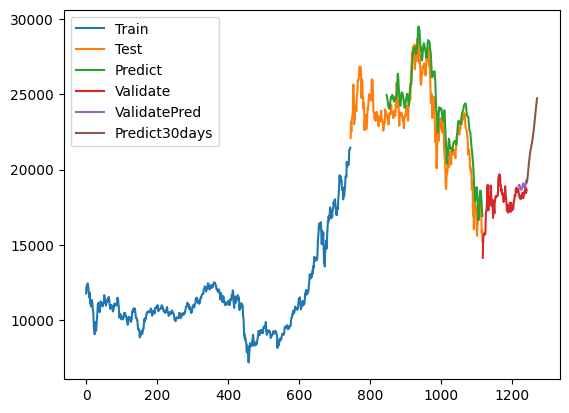

In [15]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()